# **Location of the 20C Surface Isotherm**
Created by L. Gruenburg
Last edited 6/5/2024

In [24]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import cartopy
import pandas as pn
from datetime import datetime
import gsw
#from holteandtalley import HolteAndTalley
import os
from xmovie import Movie
from shapely.geometry import Polygon, Point, MultiPolygon
import shapefile
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import geopandas as gpd

## Open all SST data
SST data were obtained from OISST satellite product using Rscript GetOISST.Rmd

In [2]:
sst1 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/CV/OISST_v2.1/OISST_daily_v2.1_1982_1985.nc')

In [3]:
sst2 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/CV/OISST_v2.1/OISST_daily_v2.1_1986_1990.nc')
sst3 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/CV/OISST_v2.1/OISST_daily_v2.1_1991_1999.nc')
sst4 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/CV/OISST_v2.1/OISST_daily_v2.1_2000_2008.nc')
sst5 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/CV/OISST_v2.1/OISST_daily_v2.1_2009_2013.nc')
sst6 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/CV/OISST_v2.1/OISST_daily_v2.1_2014_2019.nc')
sst7 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/CV/OISST_v2.1/OISST_daily_v2.1_2020_2022jul.nc')


In [4]:
sst8 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/CV/OISST_v2.1/OISST_daily_v2.1_2022jul_2023nov.nc')

In [5]:
# Put all netcdfs together
sst = xr.merge([sst1,sst2,sst3,sst4,sst5,sst6,sst7,sst8])

## Load required shapefile

In [6]:
# Load NYB shapefile
NYB = gpd.read_file('/Users/nyelab/Desktop/NYB Indicators/Datasets/Shapefiles/PlanningArea_NYocean_NYSDOS.shp')

In [7]:
# Alter the projection to WGS84 see https://epsg.io/4326
NYB = NYB.to_crs(epsg=4326)

In [8]:
# Extract the polygon
nyb_shape = NYB.geometry[0]

## Begin data analysis

In [9]:
# Prep years to loop through and group by season each time
unique_years = np.unique(pn.to_datetime(sst.time.values).year)
years = pn.to_datetime(sst.time.values).year

In [10]:
len(unique_years)*4 # number of seasons total (4 per year)

168

In [11]:
# Test the groupby seasons function
seas = sst.groupby('time.season').mean('time')

In [12]:
seas

<xarray.Dataset>
Dimensions:    (zlev: 1, latitude: 57, longitude: 81, season: 4)
Coordinates:
  * zlev       (zlev) float32 0.0
  * latitude   (latitude) float32 32.12 32.38 32.62 32.88 ... 45.62 45.88 46.12
  * longitude  (longitude) float32 280.1 280.4 280.6 280.9 ... 299.6 299.9 300.1
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst        (season, zlev, latitude, longitude) float32 18.87 20.01 ... nan
Attributes: (12/46)
    cdm_data_type:              Grid
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    Conventions:                CF-1.6, ACDD-1.3, COARDS
    creator_email:              oisst-help@noaa.gov
    creator_name:               NOAA NCEI
    creator_type:               group
    ...                         ...
    summary:                    This is the final version of the related data...
    testOutOfDate:              now-17days
    time_coverage_end:          1985-12-31T12:00:00Z
    time_coverage_start:        1982-01-01T12:00:00Z
    title:                      SST, Daily Optimum Interpolation (OI), AVHRR ...
    Westernmost_Easting:        280.125

In [13]:
# Get seasonal means for each year.  Our last complete month is October 2023,
# sofor the last year and the Autumn is only 2 months

empty = np.empty([168,len(sst.latitude),len(sst.longitude)])
empty[:,:,:] = np.nan
k=0
for i in unique_years[:-1]:
    index = np.where(years == i)
    sst_subset = sst.sst[index[0],0,:,:]
    sst_subset_seas = sst_subset.groupby('time.season').mean('time')
    empty[k:k+4,:,:] = sst_subset_seas
    k=k+4
index = np.where(years == 2023)
sst_subset = sst.sst[index[0],0,:,:]
sst_subset_seas = sst_subset.groupby('time.season').mean('time')
empty[k:k+4,:,:] = sst_subset_seas
sst_seas = empty

In [14]:
# Look at the data - seasonal climatology
sst_subset_seas


<xarray.DataArray 'sst' (season: 4, latitude: 57, longitude: 81)>
array([[[18.245173 , 20.146381 , 21.702072 , ..., 20.549654 ,
         20.502413 , 20.467758 ],
        [16.205864 , 18.176722 , 20.07793  , ..., 20.432415 ,
         20.393448 , 20.372066 ],
        [14.083279 , 15.356208 , 17.343794 , ..., 20.317066 ,
         20.2981   , 20.292759 ],
        ...,
        [       nan,        nan,        nan, ...,  2.8144827,
          2.7865522,  2.7858617],
        [       nan,        nan,        nan, ...,        nan,
                nan,  2.4318972],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[27.888914 , 28.105871 , 28.482605 , ..., 26.561516 ,
         26.552828 , 26.562277 ],
        [27.837831 , 27.846521 , 28.065763 , ..., 26.474014 ,
         26.477823 , 26.501629 ],
        [27.914667 , 27.815653 , 27.868153 , ..., 26.390434 ,
         26.408266 , 26.448256 ],
...
        [       nan,        nan,        nan, ...,  2.595761 ,
          2.510978 ,  2.490544 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,  2.1805437],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[26.175388 , 26.763535 , 27.489693 , ..., 26.716614 ,
         26.71154  , 26.687845 ],
        [25.518614 , 26.008617 , 26.693382 , ..., 26.627386 ,
         26.636309 , 26.616922 ],
        [24.953999 , 25.214159 , 25.793533 , ..., 26.555079 ,
         26.570766 , 26.54923  ],
        ...,
        [       nan,        nan,        nan, ..., 14.948923 ,
         14.848925 , 14.855689 ],
        [       nan,        nan,        nan, ...,        nan,
                nan, 14.754923 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
    zlev       float32 0.0
  * latitude   (latitude) float32 32.12 32.38 32.62 32.88 ... 45.62 45.88 46.12
  * longitude  (longitude) float32 280.1 280.4 280.6 280.9 ... 299.6 299.9 300.1
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    long_name:        Daily sea surface temperature
    standard_name:    sea_surface_temperature
    units:            degree_C
    valid_max:        45.0
    valid_min:        -3.0

In [16]:
np.shape(sst_seas)

(168, 57, 81)

In [26]:
len(np.unique(years))

42

In [17]:
# testing a new idea
index = np.where(years == 2000)
sst_subset = sst.sst[index[0],0,:,:]
wint_subset = sst_subset[sst_subset.time.dt.month.isin([1,2,3])].mean(dim = 'time')
spr_subset = sst_subset[sst_subset.time.dt.month.isin([4,5,6])].mean(dim = 'time')
sum_subset = sst_subset[sst_subset.time.dt.month.isin([7,8,9])].mean(dim = 'time')
fall_subset = sst_subset[sst_subset.time.dt.month.isin([10,11,12])].mean(dim = 'time')


In [18]:
#Updated seasonality for this grouping  JFM, AMJ, JAS, OND (as of the 2023 report we chose to sick to the seasonality in the previous calculation
# above and we DID NOT USE THIS, but it is here should you change your mind)
# Get seasonal means for each year.  Our last complete month is October 2023,
# so for the last year and the Autumn is only 1 months

empty = np.empty([168,len(sst.latitude),len(sst.longitude)])
empty[:,:,:] = np.nan
k=0
for i in unique_years[:-1]:
    index = np.where(years == i)
    sst_subset = sst.sst[index[0],0,:,:]
    wint_subset = sst_subset[sst_subset.time.dt.month.isin([1,2,3])].mean(dim = 'time')
    spr_subset = sst_subset[sst_subset.time.dt.month.isin([4,5,6])].mean(dim = 'time')
    sum_subset = sst_subset[sst_subset.time.dt.month.isin([7,8,9])].mean(dim = 'time')
    fall_subset = sst_subset[sst_subset.time.dt.month.isin([10,11,12])].mean(dim = 'time')
    empty[k,:,:] = wint_subset
    empty[k+1,:,:] = spr_subset
    empty[k+2,:,:] = sum_subset
    empty[k+3,:,:] = fall_subset
    k=k+4
    
index = np.where(years == 2023)
sst_subset = sst.sst[index[0],0,:,:]
wint_subset = sst_subset[sst_subset.time.dt.month.isin([1,2,3])].mean(dim = 'time')
spr_subset = sst_subset[sst_subset.time.dt.month.isin([4,5,6])].mean(dim = 'time')
sum_subset = sst_subset[sst_subset.time.dt.month.isin([7,8,9])].mean(dim = 'time')
fall_subset = sst_subset[sst_subset.time.dt.month.isin([10])].mean(dim = 'time')
empty[k,:,:] = wint_subset
empty[k+1,:,:] = spr_subset
empty[k+2,:,:] = sum_subset
empty[k+3,:,:] = fall_subset
sst_seas = empty


In [17]:
np.shape(sst_seas)
#42 years, 4 seasons per year = 168 it worked!

(168, 57, 81)

In [31]:
#Indicies for each season
JFM = np.arange(0,168,4)
AMJ = np.arange(1,168,4)
JAS = np.arange(2,168,4)
OND = np.arange(3,168,4)

In [18]:
#Indicies for each season THIS ONE for 2023 report
DJF = np.arange(0,168,4)
JJA = np.arange(1,168,4)
MAM = np.arange(2,168,4)
SON = np.arange(3,168,4)
#yes this seems weird but apparently groupby groups the seasons winter summer spring fall

In [19]:
#create a date vector for quarterly dates
quarterly_dates = pn.date_range('1982-01-01','2023-12-01', freq = 'BQ-FEB')

In [20]:
#checking the length of quarterly dates
np.shape(sst_seas)
len(quarterly_dates)

168

In [21]:
#function that only returns data within NYB shapefile
def inNYB(longitude, latitude, time, sst, shape):
    X = longitude
    Y = latitude
    y, x = np.meshgrid(X,Y)
    empty = np.empty([len(time), len(latitude), len(longitude)])
    empty[:,:,:] = np.nan
    for j in range(len(longitude)):
        for i in range(len(latitude)):
            if Point(y[i,j], x[i,j]).within(shape) == True:
                empty[:,i,j] = sst[:,i,j]
    return empty

In [22]:
#new seasonal sst only in the NYB
test_seas=inNYB(sst.longitude,sst.latitude,quarterly_dates,sst_seas,nyb_shape)

/var/folders/ys/jb4xnd9x6vb6xqb52tk47scr0000gp/T/ipykernel_8320/1272684537.py:3: RuntimeWarning: All-NaN slice encountered
  if np.nanmax(test_seas[SON[i],:,:]) >= 20:


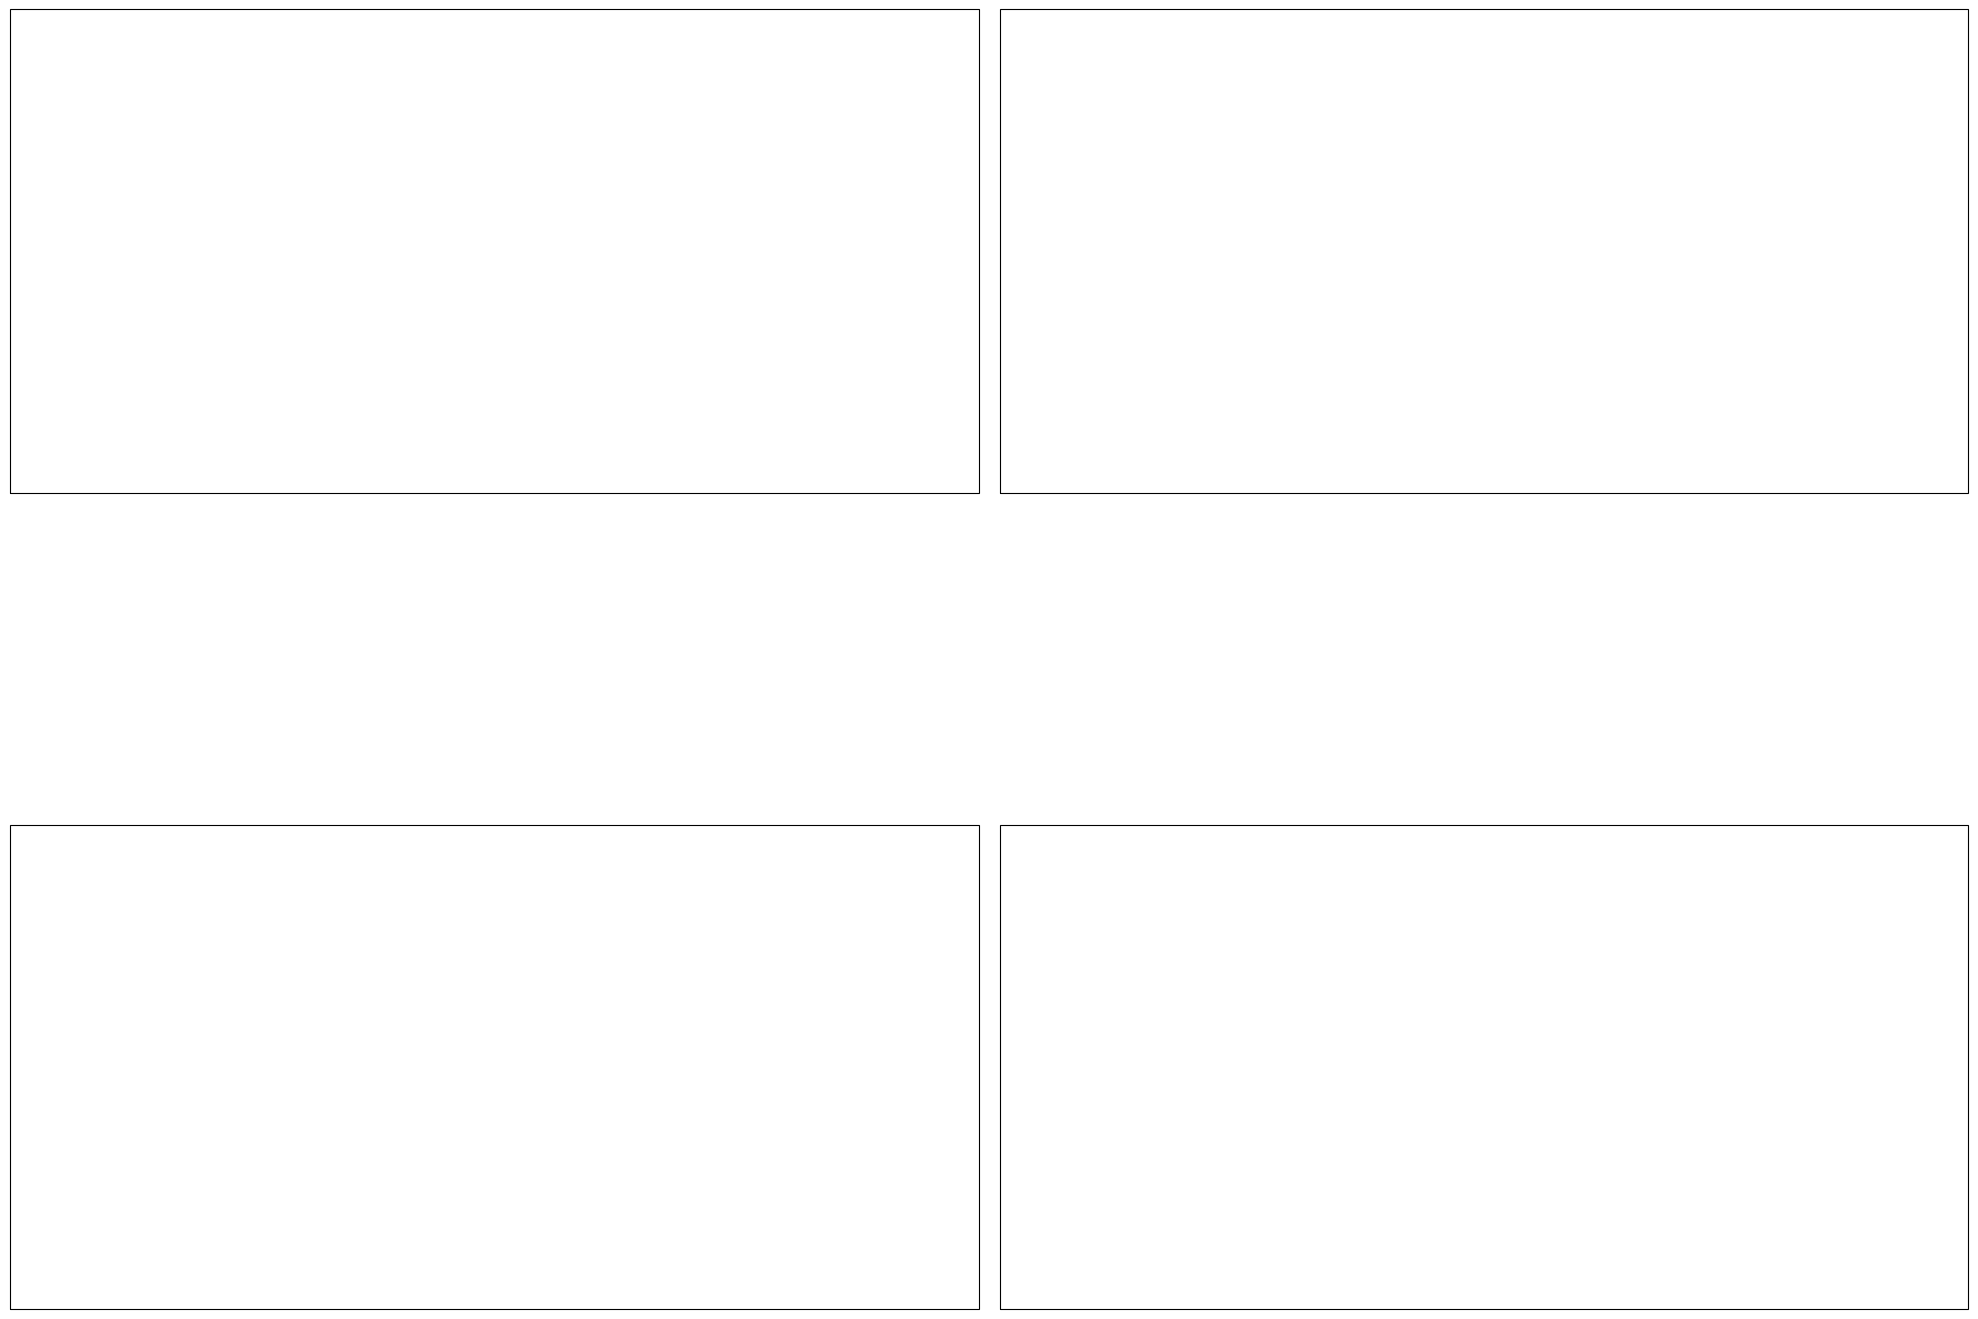

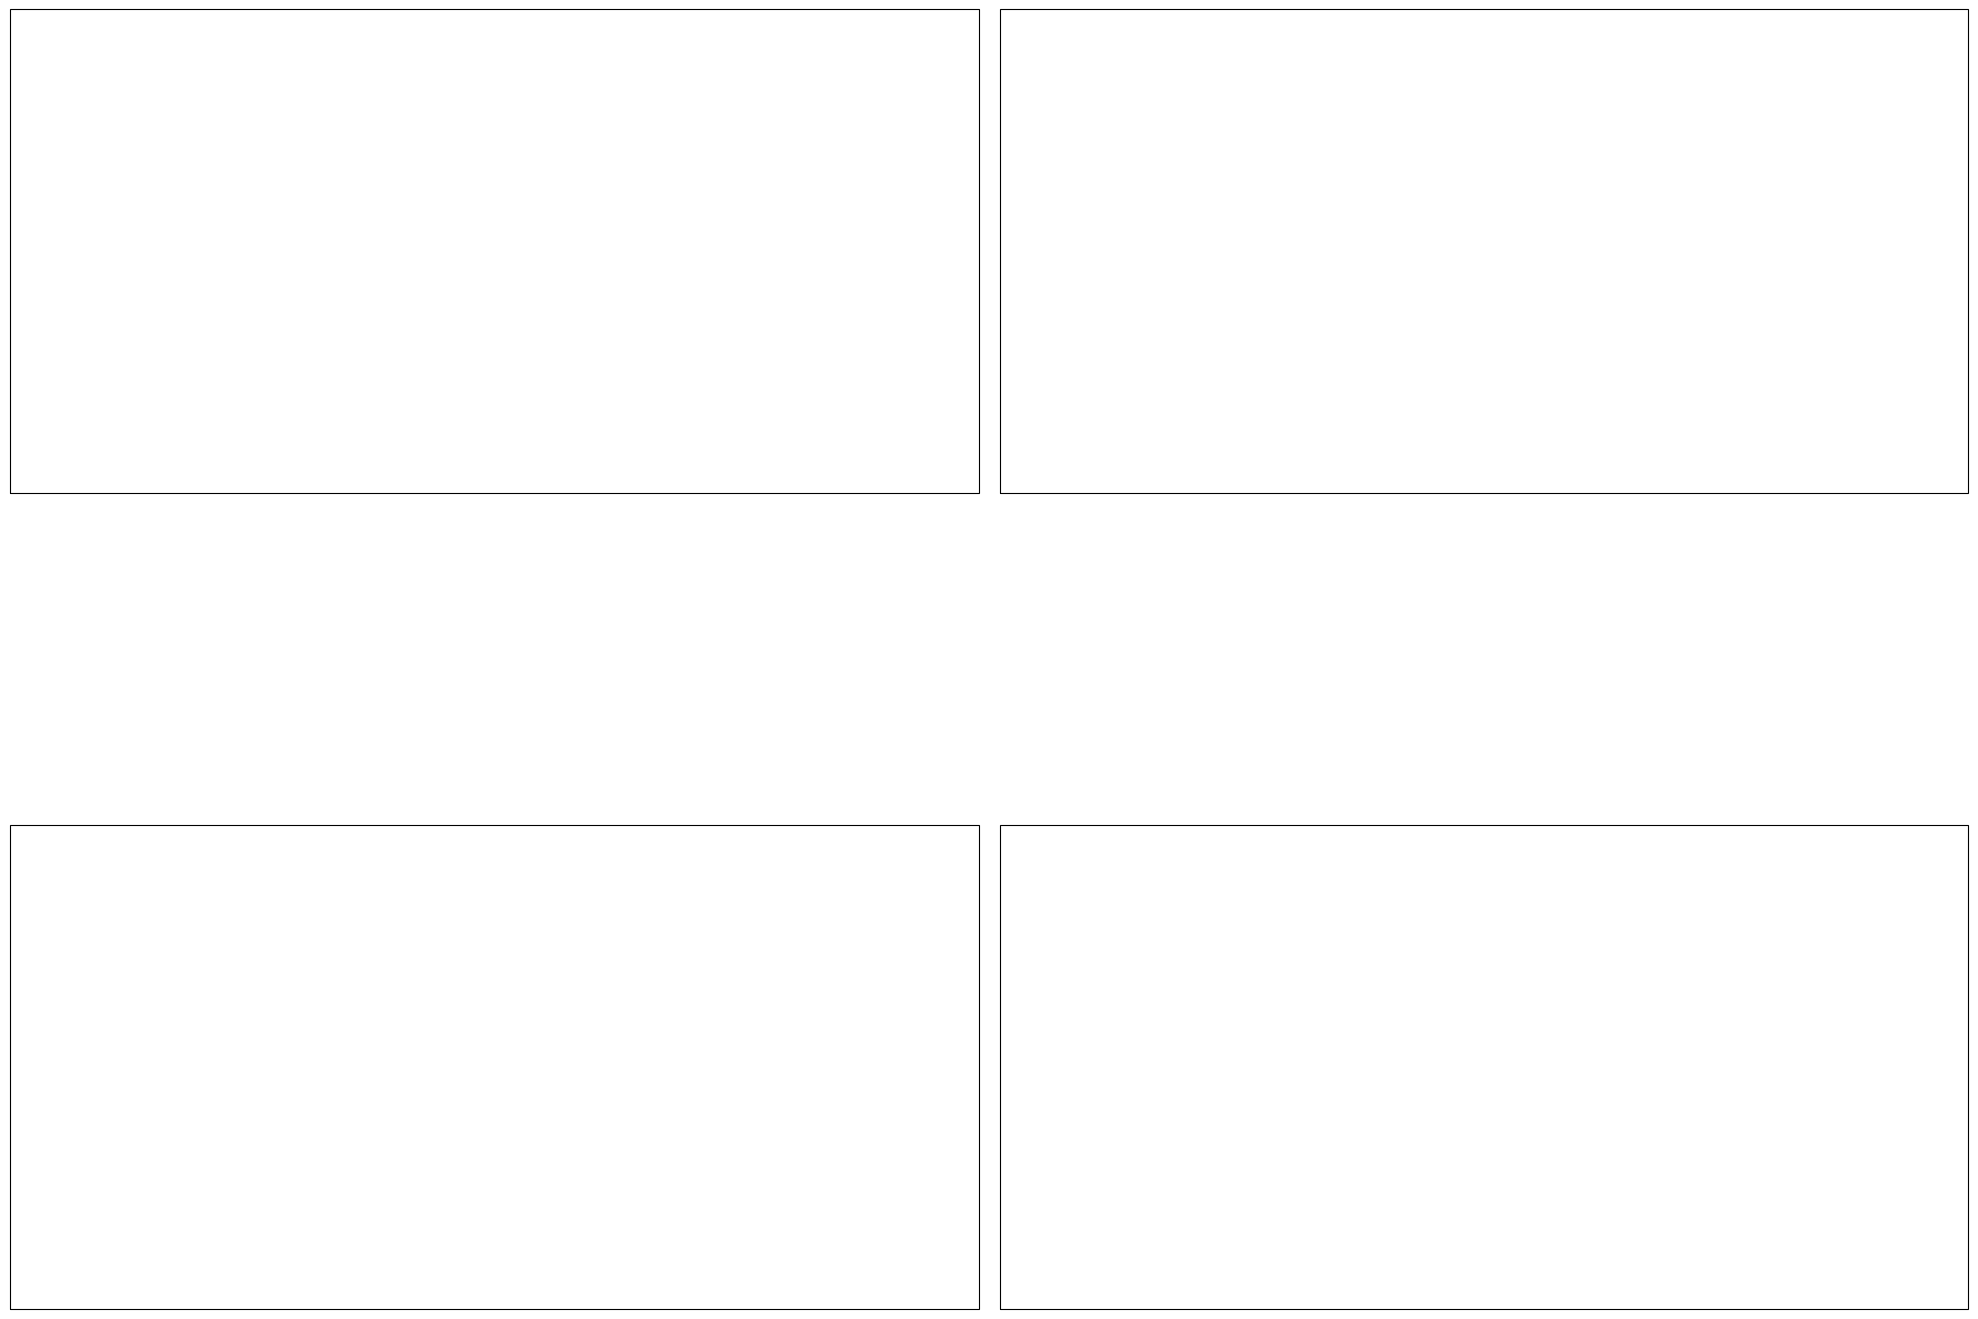

In [25]:
fig,ax = plt.subplots(ncols = 2, nrows = 2, figsize = [20,20],subplot_kw={'projection': ccrs.PlateCarree()})
for i in range(len(SON)):
    if np.nanmax(test_seas[SON[i],:,:]) >= 20:
        text = np.arange(1982,2022,1)
        text2 = str(text[i])
        if text[i]<1990:
            extent = [286,289.5,38.25,41.5]
            gl = ax[0,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.05, linestyle='--')
            gl.xlabels_top = False
            gl.xlabels_bottom = False
            gl.ylabels_right = False
            gl.ylabel_style = {'size': 20, 'color': 'k'}
            ax[0,0].set_extent(extent)
            ax[0,0].coastlines(resolution='50m')
            CS = ax[0,0].contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='r',transform=ccrs.PlateCarree())
            ax[0,0].contour(seas.longitude[25:40],seas.latitude, seas.sst[3,0,:,25:40],levels=[20], colors = 'b',linestyles = 'dashdot')
            ax[0,0].clabel(CS, fontsize=20, inline=1, fmt=text2)
            #ax[0,0].clabel(CS2, fontsize = 16, inline = 1, fmt='mean')
            ax[0,0].add_geometries(NYB.geometry,
                  ccrs.PlateCarree(),
                  facecolor='none', edgecolor = 'k')#hatch='xxxx')
            ax[0,0].set_title('20C isotherm at sea surface SON 1982-1989', fontsize = 24)
        if text[i]>=1990 and text[i]<2000:
            extent = [286,289.5,38.25,41.5]
            ax[0,1].set_extent(extent)
            gl = ax[0,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.05, linestyle='--')
            gl.xlabels_top = False
            gl.xlabels_bottom = False
            gl.ylabels_right = False
            gl.ylabels_left = False
            gl.ylabel_style = {'size': 20, 'color': 'k'}
            ax[0,1].coastlines(resolution='50m')
            CS = ax[0,1].contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='y')
            ax[0,1].contour(seas.longitude[25:40],seas.latitude, seas.sst[3,0,:,25:40],levels=[20], colors = 'b',linestyles = 'dashdot')
            ax[0,1].clabel(CS, fontsize=20, inline=1, fmt=text2)
            ax[0,1].add_geometries(NYB.geometry,
                    ccrs.PlateCarree(),
                    facecolor='none', edgecolor = 'k')#hatch='xxxx')
            ax[0,1].set_title('20C isotherm at sea surface SON 1990-1999', fontsize = 24)
        if text[i]>=2000 and text[i]<2010:
            extent = [286,289.5,38.25,41.5]
            ax[1,0].set_extent(extent)
            gl = ax[1,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.05, linestyle='--')
            gl.xlabels_top = False
            gl.xlabels_bottom = True
            gl.ylabels_right = False
            gl.ylabels_left = True
            gl.ylabel_style = {'size': 20, 'color': 'k'}
            gl.xlabel_style = {'size': 20, 'color': 'k'}
            ax[1,0].coastlines(resolution='50m')
            CS = ax[1,0].contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='g')
            ax[1,0].contour(seas.longitude[25:40],seas.latitude, seas.sst[3,0,:,25:40],levels=[20], colors = 'b',linestyles = 'dashdot')
            ax[1,0].clabel(CS, fontsize=20, inline=1, fmt=text2)
            ax[1,0].add_geometries(NYB.geometry,
                  ccrs.PlateCarree(),
                  facecolor='none', edgecolor = 'k')#hatch='xxxx')
            ax[1,0].set_title('20C isotherm at sea surface SON 2000-2009', fontsize = 24)
        if text[i]>=2010:
            extent = [286,289.5,38.25,41.5]
            ax[1,1].set_extent(extent)
            gl = ax[1,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.05, linestyle='--')
            gl.xlabels_top = False
            gl.xlabels_bottom = True
            gl.ylabels_right = False
            gl.ylabels_left = False
            gl.ylabel_style = {'size': 20, 'color': 'k'}
            gl.xlabel_style = {'size': 20, 'color': 'k'}
            ax[1,1].coastlines(resolution='50m')
            CS = ax[1,1].contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='k')
            ax[1,1].contour(seas.longitude[25:40],seas.latitude, seas.sst[3,0,:,25:40],levels=[20], colors = 'b',linestyles = 'dashdot')
            ax[1,1].clabel(CS, fontsize=20, inline=1, fmt=text2)
            ax[1,1].add_geometries(NYB.geometry,
                  ccrs.PlateCarree(),
                  facecolor='none', edgecolor = 'k')#hatch='xxxx')
            ax[1,1].set_title('20C isotherm at sea surface SON 2010-2022', fontsize = 24)

plt.tight_layout()

## Figures for 2023 report

/var/folders/ys/jb4xnd9x6vb6xqb52tk47scr0000gp/T/ipykernel_8320/4165886393.py:19: RuntimeWarning: Mean of empty slice
  CS1 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JJA[a:b+1],:,25:40],0),levels=[20], colors = 'c',linewidths = 5)
/var/folders/ys/jb4xnd9x6vb6xqb52tk47scr0000gp/T/ipykernel_8320/4165886393.py:27: RuntimeWarning: Mean of empty slice
  CS2 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JJA[a:b+1],:,25:40],0),levels=[20], colors = 'g',linewidths = 5)
/var/folders/ys/jb4xnd9x6vb6xqb52tk47scr0000gp/T/ipykernel_8320/4165886393.py:35: RuntimeWarning: Mean of empty slice
  CS3 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JJA[a:b+1],:,25:40],0),levels=[20], colors = 'orange',linewidths = 5)
/var/folders/ys/jb4xnd9x6vb6xqb52tk47scr0000gp/T/ipykernel_8320/4165886393.py:43: RuntimeWarning: Mean of empty slice
  CS4 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JJA[a:b+1],:,25:40],0),l

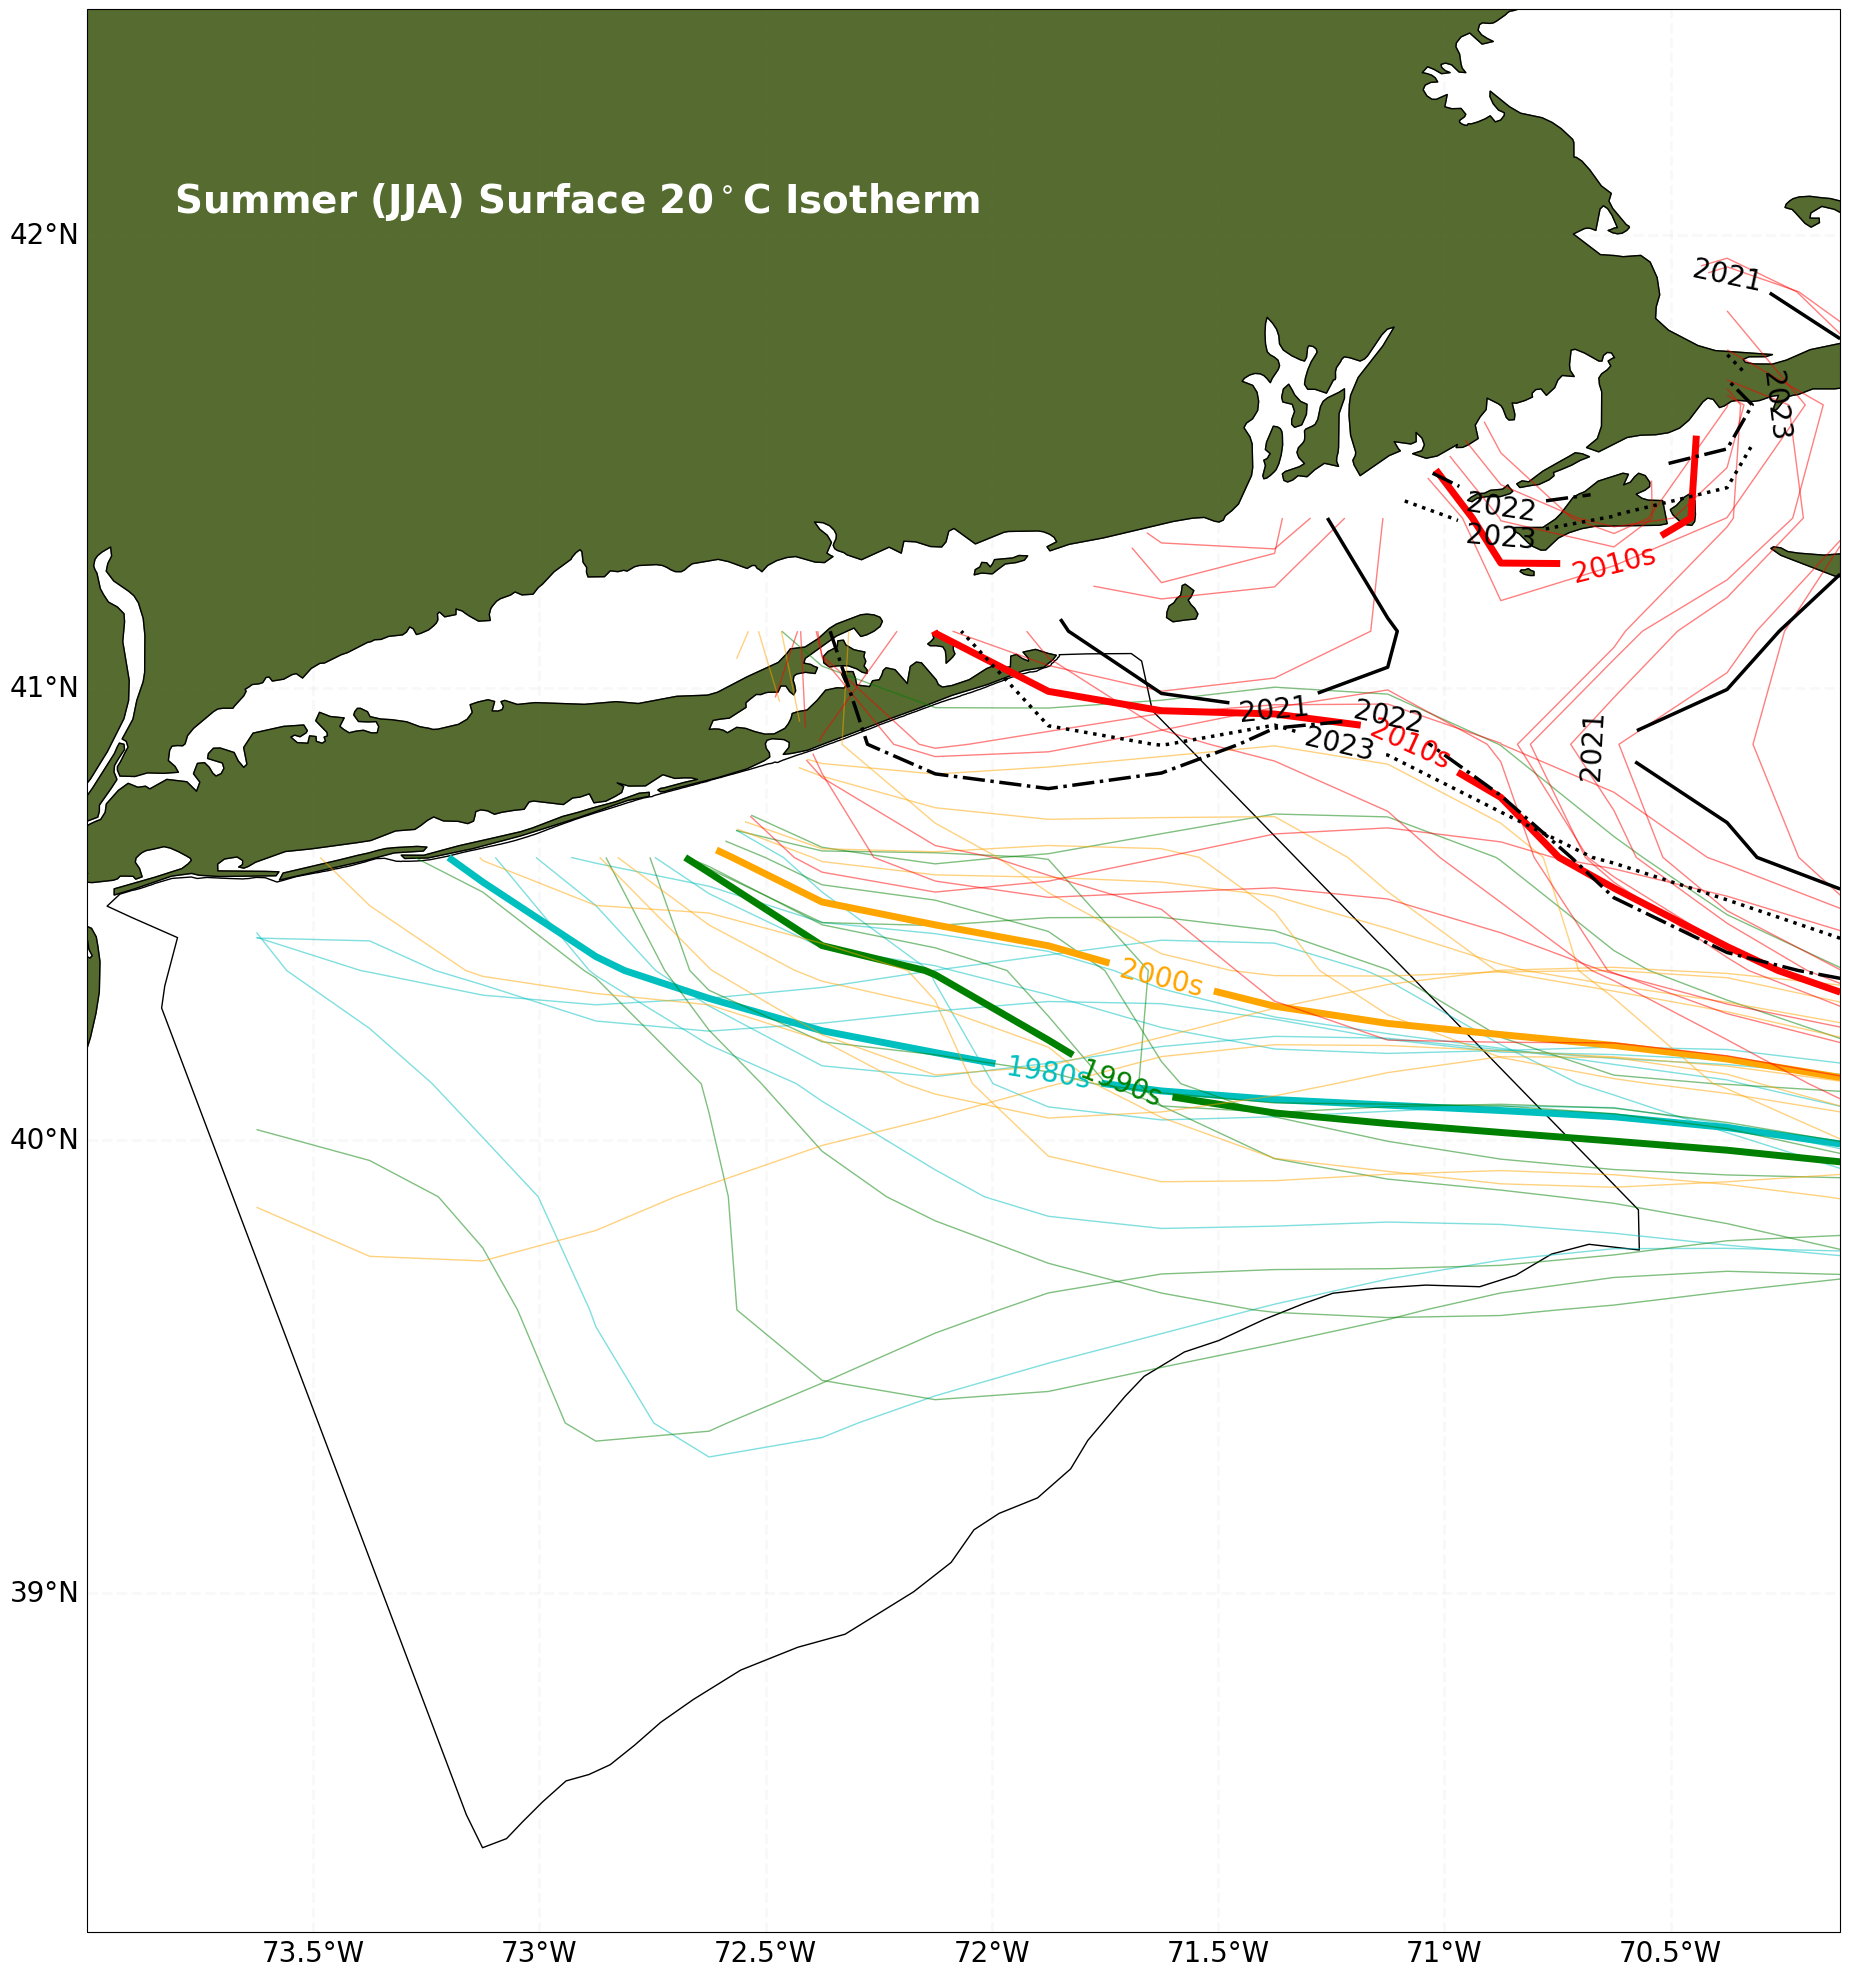

In [27]:
fig,ax = plt.subplots(ncols = 1, nrows = 1, figsize = [20,20],subplot_kw={'projection': ccrs.PlateCarree()})
extent = [286,289.875,38.25,42.5]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
ax.coastlines(resolution='10m')
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND, color = 'darkolivegreen')
ax.add_geometries(NYB.geometry,
                  ccrs.PlateCarree(),
                  facecolor='none', edgecolor = 'k')
for i in range(len(JJA)):
    if np.nanmax(sst_seas[JJA[i],:,:]) >= 20:
        text = np.arange(1982,2024,1)
        text2 = str(text[i])
        if text[i]<1990:
            if text[i] == 1982:
                a = i
            if text[i] == 1989:
                b = i
                CS1 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JJA[a:b+1],:,25:40],0),levels=[20], colors = 'c',linewidths = 5)
                ax.clabel(CS1, fontsize = 20, inline =1, fmt='1980s')
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JJA[i],:,25:40],levels = [20],colors='c',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=1990 and text[i]<2000:
            if text[i] == 1990:
                a = i
            if text[i] == 1999:
                b = i
                CS2 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JJA[a:b+1],:,25:40],0),levels=[20], colors = 'g',linewidths = 5)
                ax.clabel(CS2, fontsize = 20, inline =1, fmt='1990s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JJA[i],:,25:40],levels = [20],colors='g',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=2000 and text[i]<2010:
            if text[i] == 2000:
                a = i
            if text[i] == 2009:
                b = i
                CS3 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JJA[a:b+1],:,25:40],0),levels=[20], colors = 'orange',linewidths = 5)
                ax.clabel(CS3, fontsize = 20, inline =1, fmt='2000s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JJA[i],:,25:40],levels = [20],colors='orange',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=2010 and text[i] < 2021:
            if text[i] == 2010:
                a = i
            if text[i] == 2019:
                b = i
                CS4 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JJA[a:b+1],:,25:40],0),levels=[20], colors = 'r',linewidths = 5)
                ax.clabel(CS4, fontsize = 20, inline =1, fmt='2010s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JJA[i],:,25:40],levels = [20],colors='r',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i] ==2021:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JJA[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree())
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
        if text[i] ==2022:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JJA[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree(), linestyles = '-.')
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
        if text[i] ==2023:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JJA[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree(), linestyles = 'dotted')
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
            
ax.text(0.05, 0.9, 'Summer (JJA) Surface 20$^\circ$C Isotherm', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize = 28, color = 'white', weight = 'bold')

gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_right = False
gl.ylabel_style = {'size': 20, 'color': 'k'}
gl.xlabel_style = {'size': 20, 'color': 'k'}
plt.tight_layout()

/var/folders/ys/jb4xnd9x6vb6xqb52tk47scr0000gp/T/ipykernel_8320/1400256202.py:19: RuntimeWarning: Mean of empty slice
  CS1 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[SON[a:b+1],:,25:40],0),levels=[20], colors = 'c',linewidths = 5)
/var/folders/ys/jb4xnd9x6vb6xqb52tk47scr0000gp/T/ipykernel_8320/1400256202.py:27: RuntimeWarning: Mean of empty slice
  CS2 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[SON[a:b+1],:,25:40],0),levels=[20], colors = 'g',linewidths = 5)
/var/folders/ys/jb4xnd9x6vb6xqb52tk47scr0000gp/T/ipykernel_8320/1400256202.py:35: RuntimeWarning: Mean of empty slice
  CS3 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[SON[a:b+1],:,25:40],0),levels=[20], colors = 'orange',linewidths = 5)
/var/folders/ys/jb4xnd9x6vb6xqb52tk47scr0000gp/T/ipykernel_8320/1400256202.py:43: RuntimeWarning: Mean of empty slice
  CS4 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[SON[a:b+1],:,25:40],0),l

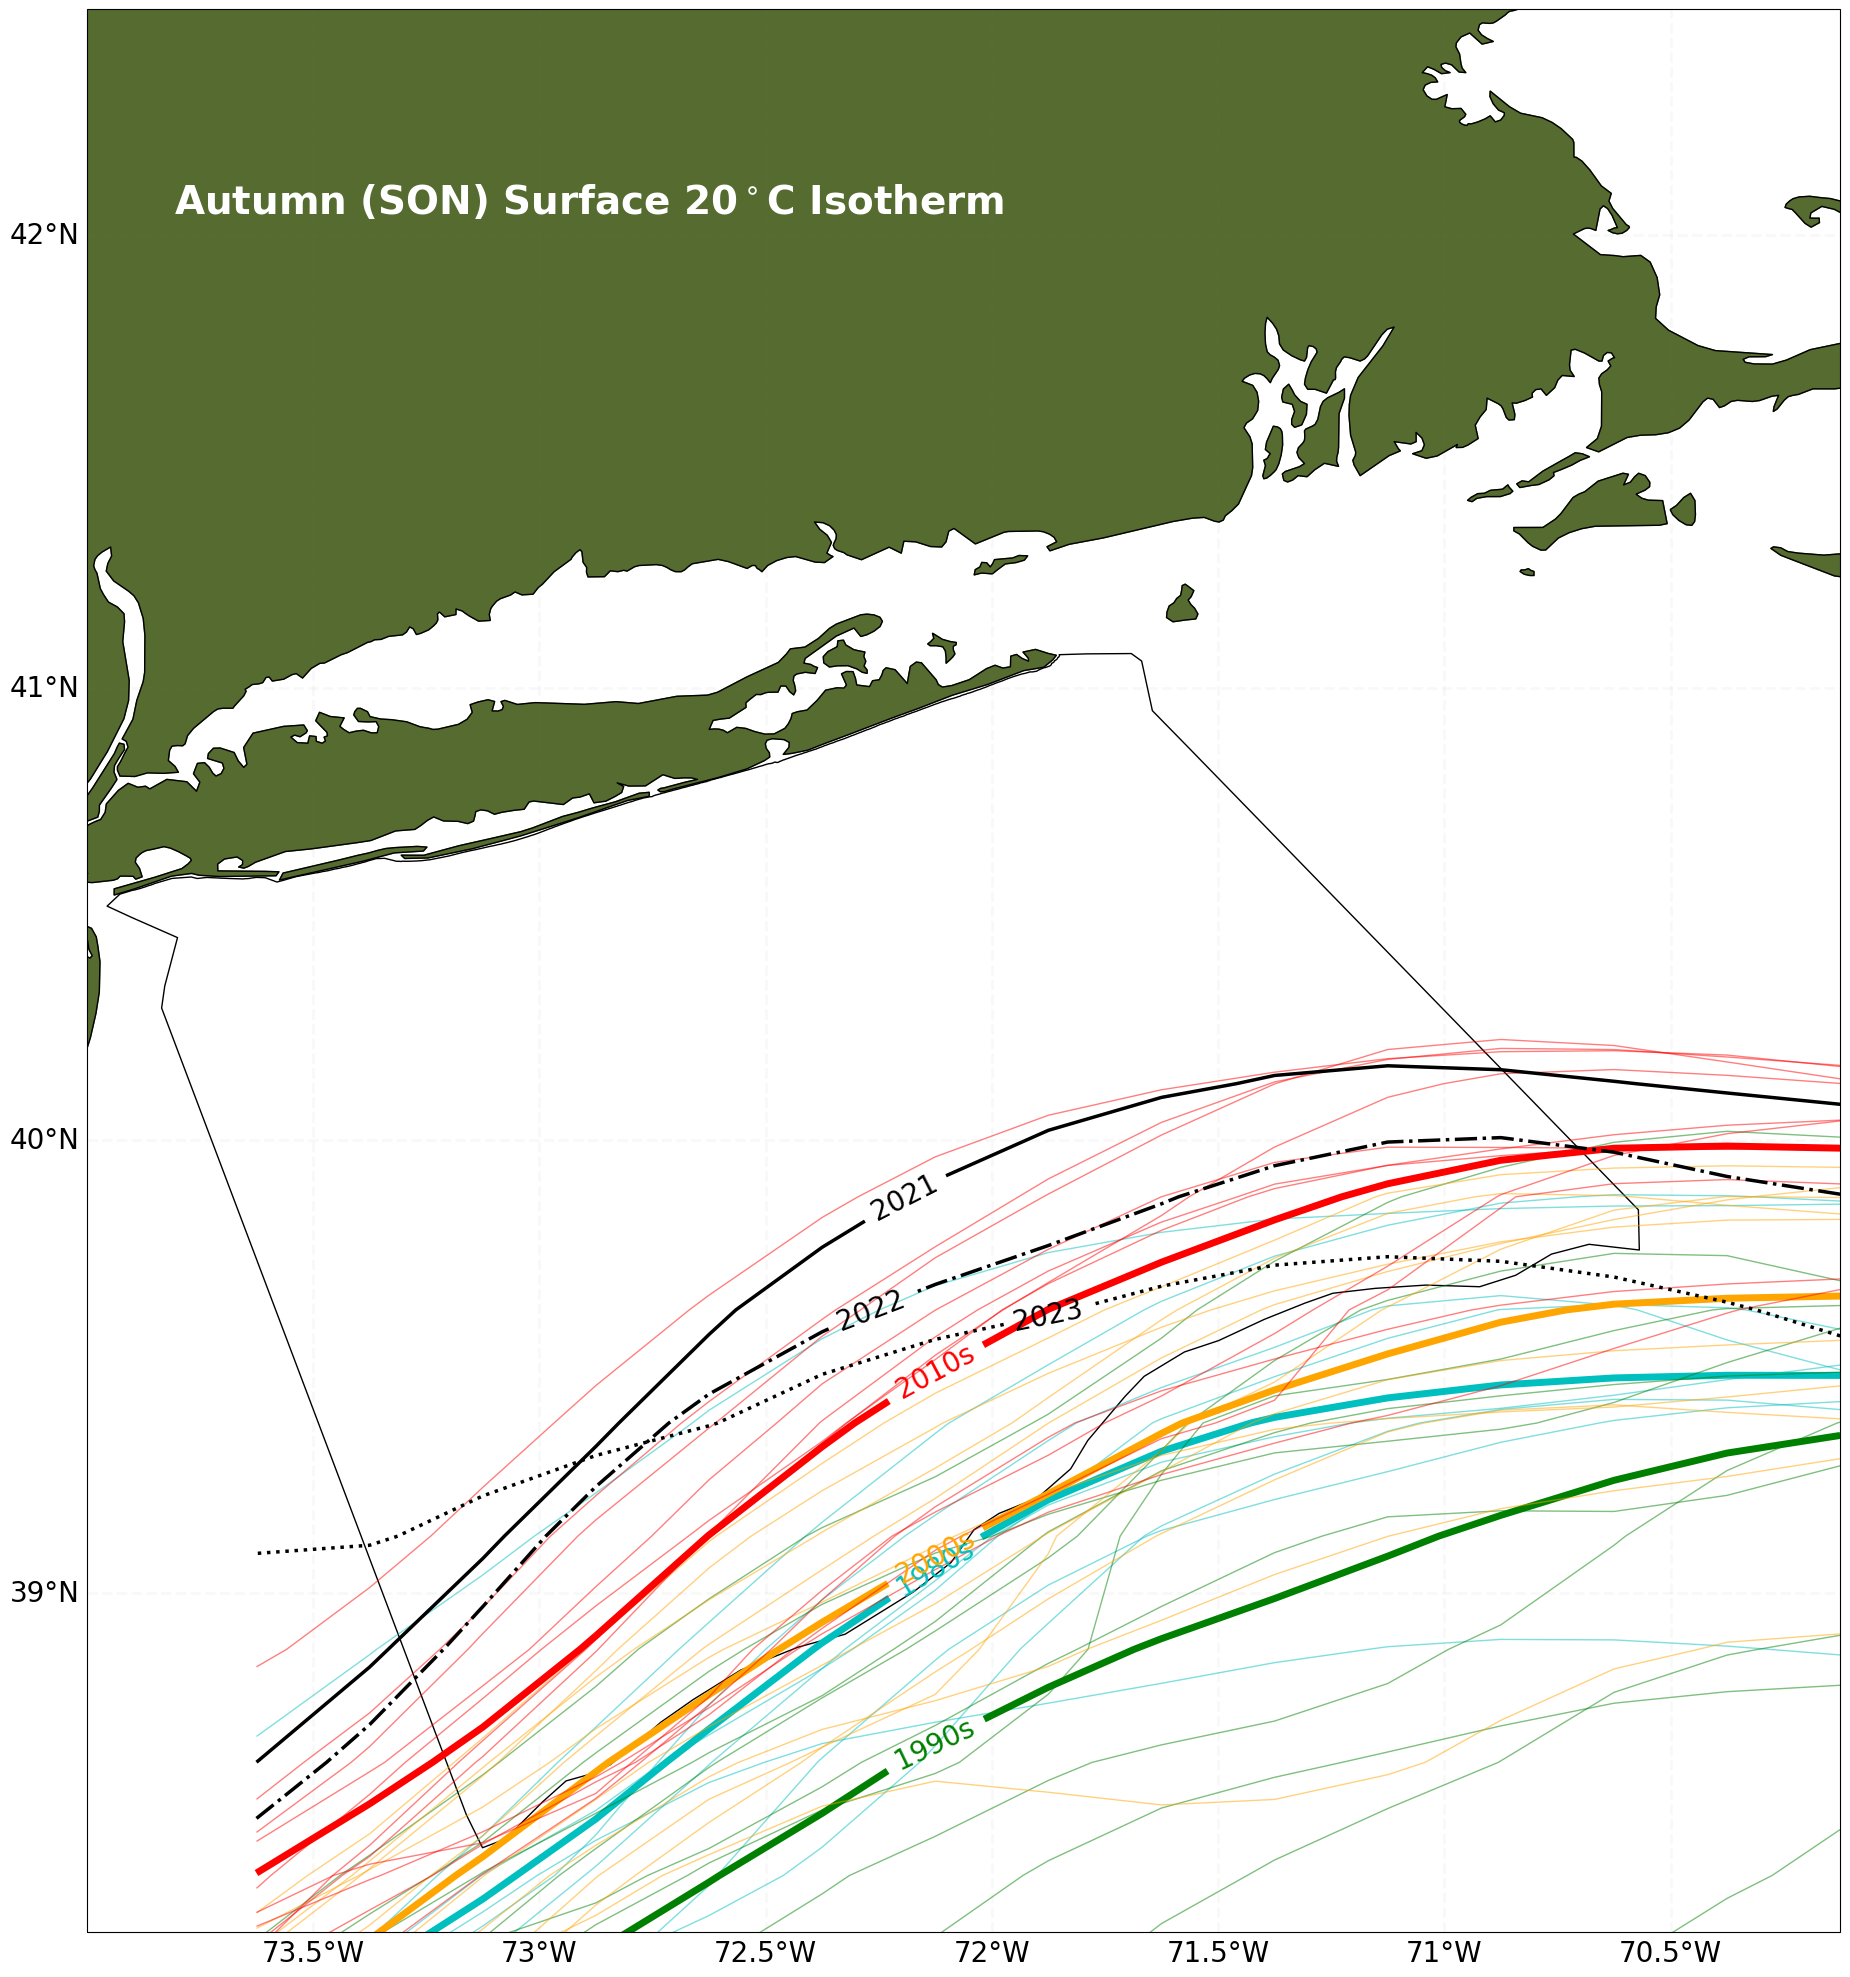

In [28]:
fig,ax = plt.subplots(ncols = 1, nrows = 1, figsize = [20,20],subplot_kw={'projection': ccrs.PlateCarree()})
extent = [286,289.875,38.25,42.5]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
ax.coastlines(resolution='10m')
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND, color = 'darkolivegreen')
ax.add_geometries(NYB.geometry,
                  ccrs.PlateCarree(),
                  facecolor='none', edgecolor = 'k')
for i in range(len(SON)):
    if np.nanmax(sst_seas[SON[i],:,:]) >= 20:
        text = np.arange(1982,2024,1)
        text2 = str(text[i])
        if text[i]<1990:
            if text[i] == 1982:
                a = i
            if text[i] == 1989:
                b = i
                CS1 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[SON[a:b+1],:,25:40],0),levels=[20], colors = 'c',linewidths = 5)
                ax.clabel(CS1, fontsize = 20, inline =1, fmt='1980s')
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='c',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=1990 and text[i]<2000:
            if text[i] == 1990:
                a = i
            if text[i] == 1999:
                b = i
                CS2 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[SON[a:b+1],:,25:40],0),levels=[20], colors = 'g',linewidths = 5)
                ax.clabel(CS2, fontsize = 20, inline =1, fmt='1990s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='g',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=2000 and text[i]<2010:
            if text[i] == 2000:
                a = i
            if text[i] == 2009:
                b = i
                CS3 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[SON[a:b+1],:,25:40],0),levels=[20], colors = 'orange',linewidths = 5)
                ax.clabel(CS3, fontsize = 20, inline =1, fmt='2000s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='orange',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=2010 and text[i] < 2021:
            if text[i] == 2010:
                a = i
            if text[i] == 2019:
                b = i
                CS4 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[SON[a:b+1],:,25:40],0),levels=[20], colors = 'r',linewidths = 5)
                ax.clabel(CS4, fontsize = 20, inline =1, fmt='2010s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='r',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i] ==2021:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree())
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
        if text[i] ==2022:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree(), linestyles = '-.')
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
        if text[i] ==2023:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[SON[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree(), linestyles = 'dotted')
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
            
ax.text(0.05, 0.9, 'Autumn (SON) Surface 20$^\circ$C Isotherm', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize = 28, color = 'white', weight = 'bold')

gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_right = False
gl.ylabel_style = {'size': 20, 'color': 'k'}
gl.xlabel_style = {'size': 20, 'color': 'k'}
plt.tight_layout()

NameError: name 'JAS' is not defined

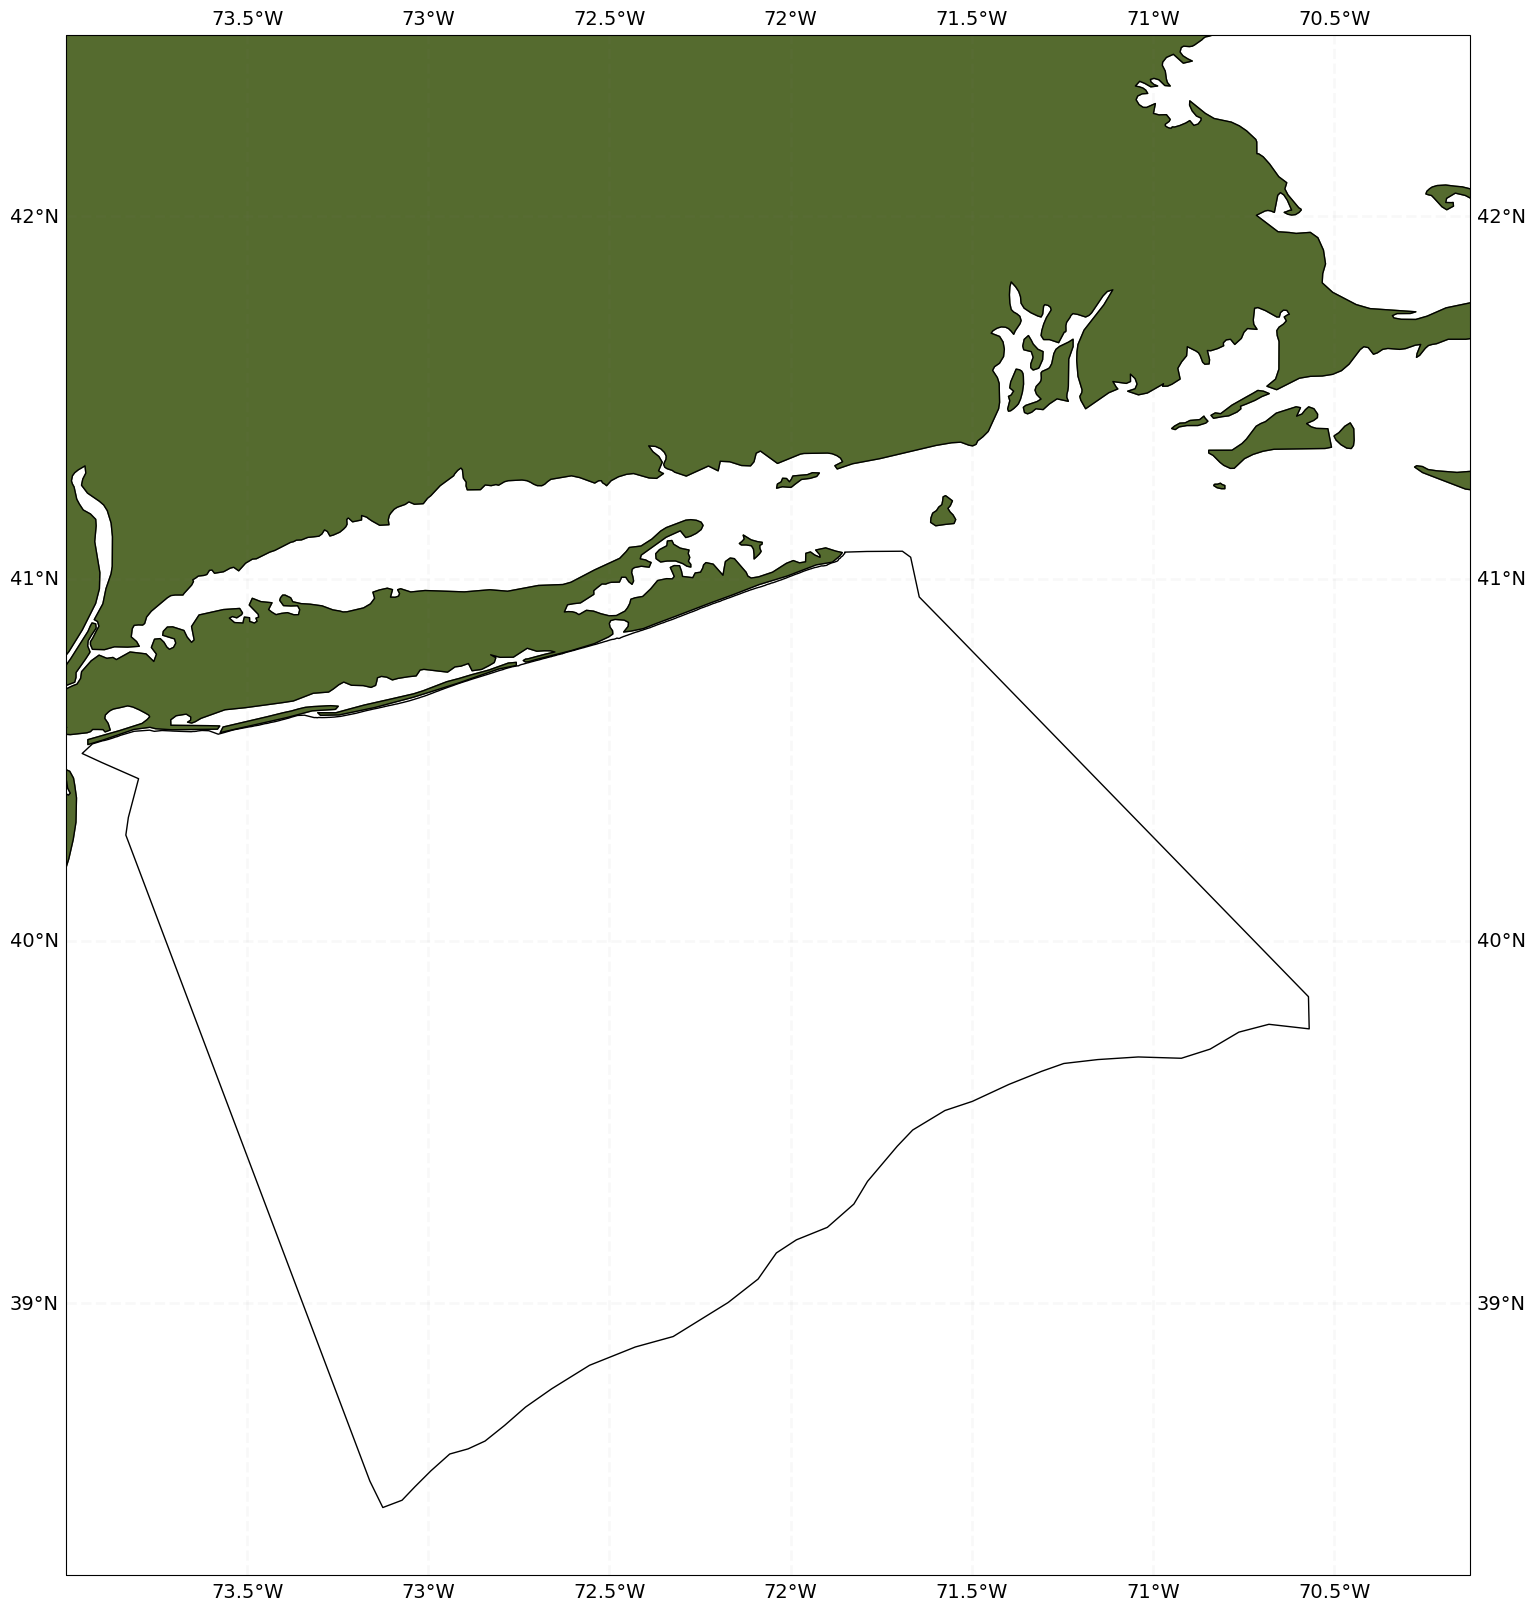

In [29]:
fig,ax = plt.subplots(ncols = 1, nrows = 1, figsize = [20,20],subplot_kw={'projection': ccrs.PlateCarree()})
extent = [286,289.875,38.25,42.5]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
ax.coastlines(resolution='10m')
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND, color = 'darkolivegreen')
ax.add_geometries(NYB.geometry,
                  ccrs.PlateCarree(),
                  facecolor='none', edgecolor = 'k')
for i in range(len(JAS)):
    if np.nanmax(sst_seas[JAS[i],:,:]) >= 20:
        text = np.arange(1982,2024,1)
        text2 = str(text[i])
        if text[i]<1990:
            if text[i] == 1982:
                a = i
            if text[i] == 1989:
                b = i
                CS1 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JAS[a:b+1],:,25:40],0),levels=[20], colors = 'c',linewidths = 5)
                ax.clabel(CS1, fontsize = 20, inline =1, fmt='1980s')
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JAS[i],:,25:40],levels = [20],colors='c',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=1990 and text[i]<2000:
            if text[i] == 1990:
                a = i
            if text[i] == 1999:
                b = i
                CS2 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JAS[a:b+1],:,25:40],0),levels=[20], colors = 'g',linewidths = 5)
                ax.clabel(CS2, fontsize = 20, inline =1, fmt='1990s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JAS[i],:,25:40],levels = [20],colors='g',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=2000 and text[i]<2010:
            if text[i] == 2000:
                a = i
            if text[i] == 2009:
                b = i
                CS3 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JAS[a:b+1],:,25:40],0),levels=[20], colors = 'orange',linewidths = 5)
                ax.clabel(CS3, fontsize = 20, inline =1, fmt='2000s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JAS[i],:,25:40],levels = [20],colors='orange',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=2010 and text[i] < 2021:
            if text[i] == 2010:
                a = i
            if text[i] == 2019:
                b = i
                CS4 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[JAS[a:b+1],:,25:40],0),levels=[20], colors = 'r',linewidths = 5)
                ax.clabel(CS4, fontsize = 20, inline =1, fmt='2010s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JAS[i],:,25:40],levels = [20],colors='r',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i] ==2021:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JAS[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree())
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
        if text[i] ==2022:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JAS[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree(), linestyles = '-.')
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
        if text[i] ==2023:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[JAS[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree(), linestyles = '-.')
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
            
ax.text(0.05, 0.9, 'Summer (JAS) Surface 20$^\circ$C Isotherm', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize = 28, color = 'white', weight = 'bold')

gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_right = False
gl.ylabel_style = {'size': 20, 'color': 'k'}
gl.xlabel_style = {'size': 20, 'color': 'k'}
plt.tight_layout()

NameError: name 'OND' is not defined

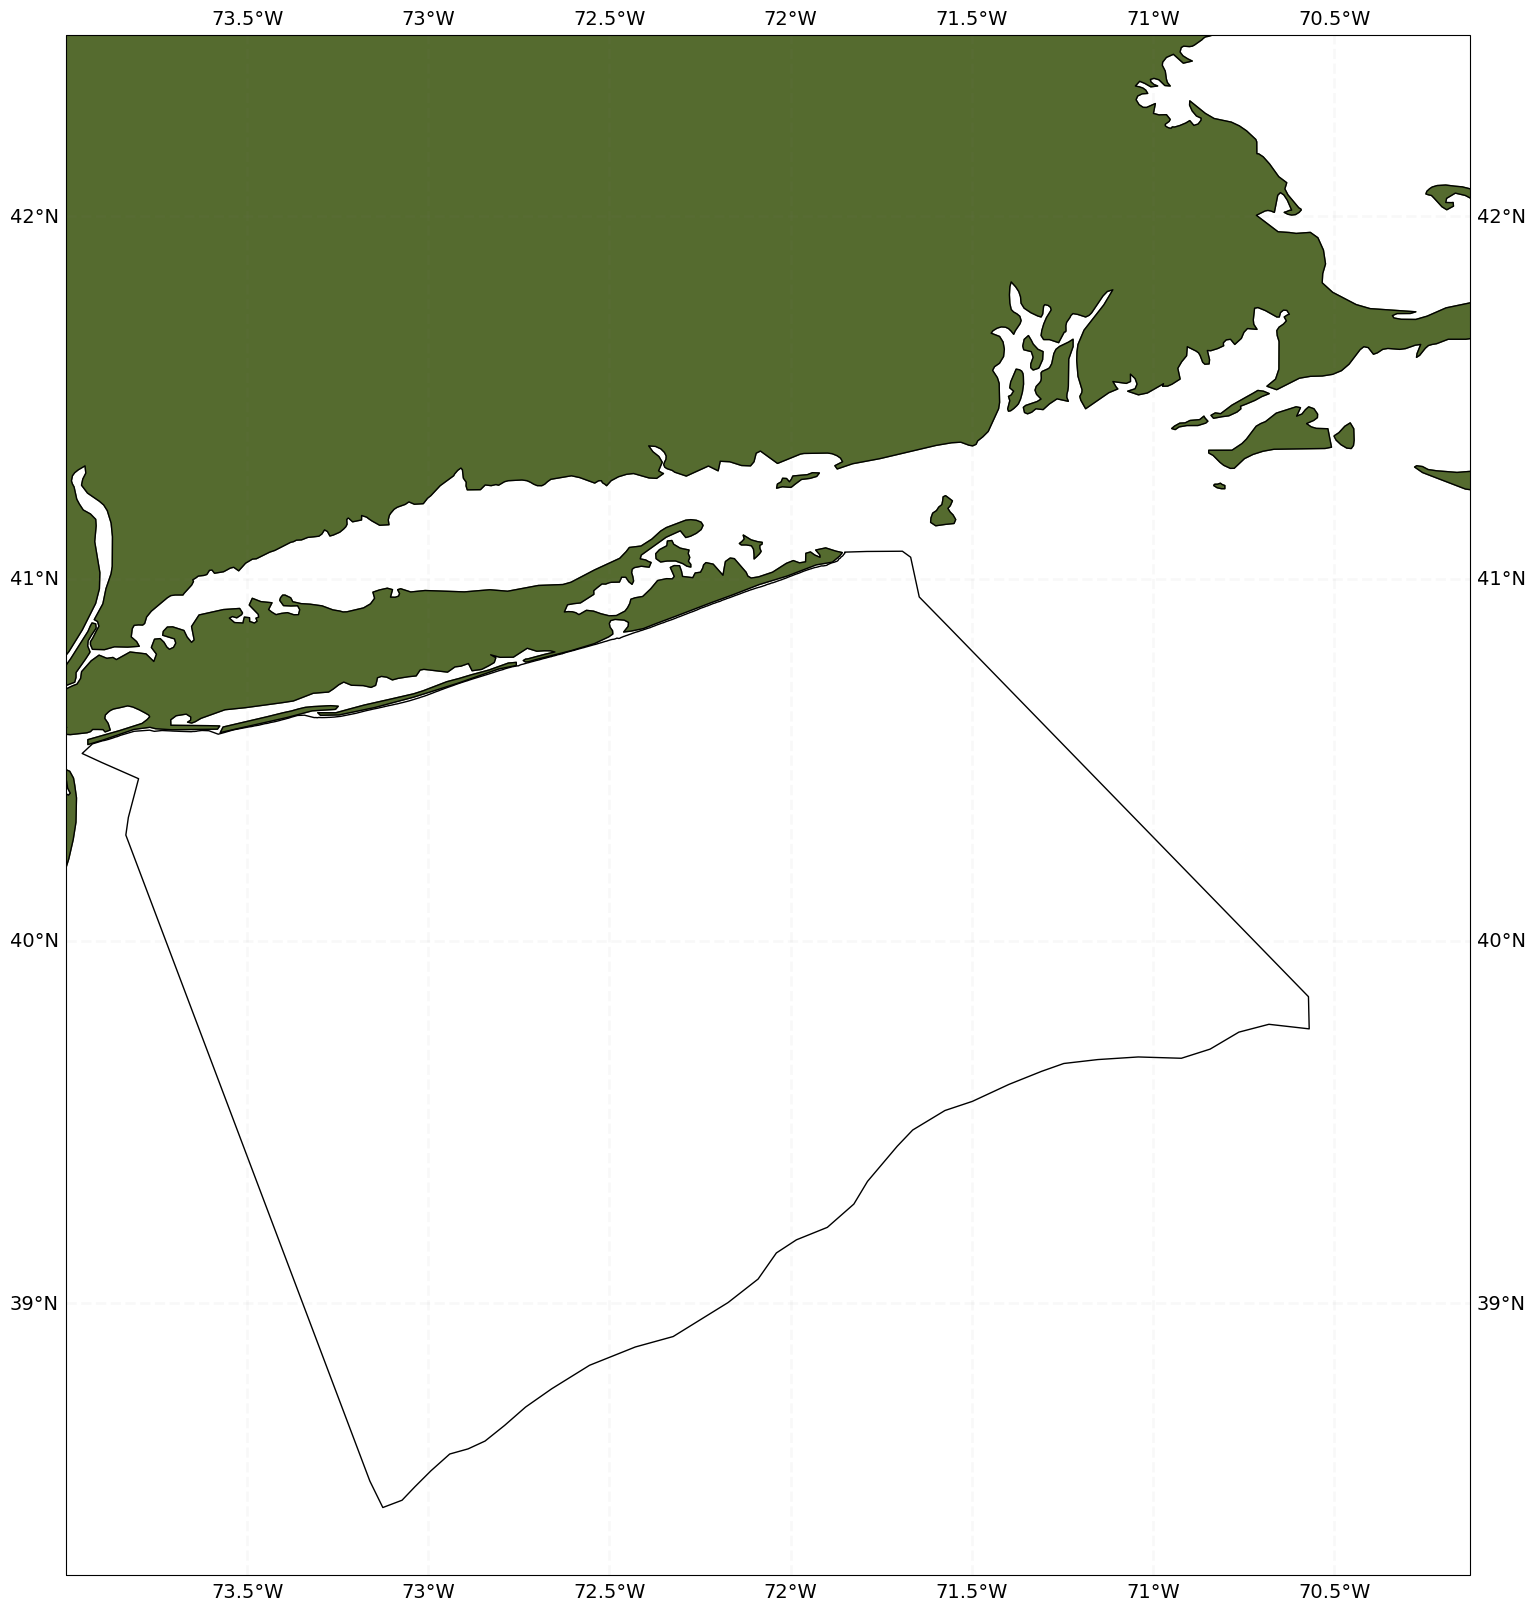

In [30]:
fig,ax = plt.subplots(ncols = 1, nrows = 1, figsize = [20,20],subplot_kw={'projection': ccrs.PlateCarree()})
extent = [286,289.875,38.25,42.5]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
ax.coastlines(resolution='10m')
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND, color = 'darkolivegreen')
ax.add_geometries(NYB.geometry,
                  ccrs.PlateCarree(),
                  facecolor='none', edgecolor = 'k')
for i in range(len(OND)):
    if np.nanmax(sst_seas[OND[i],:,:]) >= 20:
        text = np.arange(1982,2023,1)
        text2 = str(text[i])
        if text[i]<1990:
            if text[i] == 1982:
                a = i
            if text[i] == 1989:
                b = i
                CS1 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[OND[a:b+1],:,25:40],0),levels=[20], colors = 'c',linewidths = 5)
                ax.clabel(CS1, fontsize = 20, inline =1, fmt='1980s')
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[OND[i],:,25:40],levels = [20],colors='c',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=1990 and text[i]<2000:
            if text[i] == 1990:
                a = i
            if text[i] == 1999:
                b = i
                CS2 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[OND[a:b+1],:,25:40],0),levels=[20], colors = 'g',linewidths = 5)
                ax.clabel(CS2, fontsize = 20, inline =1, fmt='1990s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[OND[i],:,25:40],levels = [20],colors='g',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=2000 and text[i]<2010:
            if text[i] == 2000:
                a = i
            if text[i] == 2009:
                b = i
                CS3 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[OND[a:b+1],:,25:40],0),levels=[20], colors = 'orange',linewidths = 5)
                ax.clabel(CS3, fontsize = 20, inline =1, fmt='2000s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[OND[i],:,25:40],levels = [20],colors='orange',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i]>=2010 and text[i] < 2021:
            if text[i] == 2010:
                a = i
            if text[i] == 2019:
                b = i
                CS4 = ax.contour(seas.longitude[25:40],seas.latitude, np.nanmean(sst_seas[OND[a:b+1],:,25:40],0),levels=[20], colors = 'r',linewidths = 5)
                ax.clabel(CS4, fontsize = 20, inline =1, fmt='2010s')            
            ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[OND[i],:,25:40],levels = [20],colors='r',alpha = 0.5, linewidths = 1,transform=ccrs.PlateCarree())
        if text[i] ==2021:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[OND[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree())
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
        if text[i] ==2022:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[OND[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree(), linestyles = '-.')
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
        if text[i] ==2023:
            CS = ax.contour(sst.longitude[25:40],sst.latitude,sst_seas[OND[i],:,25:40],levels = [20],colors='k',linewidths = 2.5,transform=ccrs.PlateCarree(), linestyles = '-.')
            ax.clabel(CS, fontsize=20, inline=1, fmt=text2)
            
ax.text(0.05, 0.9, 'Autumn (OND) Surface 20$^\circ$C Isotherm', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize = 28, color = 'white', weight = 'bold')

gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_right = False
gl.ylabel_style = {'size': 20, 'color': 'k'}
gl.xlabel_style = {'size': 20, 'color': 'k'}
plt.tight_layout()

## You can stop here.  The autumn and summer 20C isotherm figures for the indicator report are above.  Everything below here is either old, or experiments/trying different ways to represent the data

In [294]:
def inNYB(longitude, latitude, time, sst, shape):
    X = longitude
    Y = latitude
    y, x = np.meshgrid(X,Y)
    empty = np.empty([len(time), len(latitude), len(longitude)])
    empty[:,:,:] = np.nan
    for j in range(len(longitude)):
        for i in range(len(latitude)):
            if Point(y[i,j], x[i,j]).within(shape) == True:
                empty[:,i,j] = sst[:,i,j]
    return empty

In [293]:
X = (sst.longitude-360)
Y = sst.latitude
y, x = np.meshgrid(X,Y)
np.shape(x)
np.shape(Y)
x[10,10]
y[10,10]
Point(y[30,30], x[30,30]).within(nyb_shape)

True

In [292]:
x[30,30]
y[30,30]

72.375

In [150]:
#sst.time
time_SON = np.arange(1982,2022
          ,1)
time_JJA = np.arange(1982,2023
          ,1)

In [295]:
son_NYB = inNYB(sst.longitude-360,sst.latitude,time_SON,sst_seas[SON],nyb_shape)
np.shape(son_NYB)

jja_NYB = inNYB(sst.longitude-360,sst.latitude,time_JJA,sst_seas[JJA],nyb_shape)
np.shape(jja_NYB)

(41, 57, 81)

<ipython-input-307-c3775484057f>:5: UserWarning: No contour levels were found within the data range.
  C = plt.contour(sst.longitude[25:40]-360,sst.latitude,jja_NYB[i,:,25:40],levels = [20])


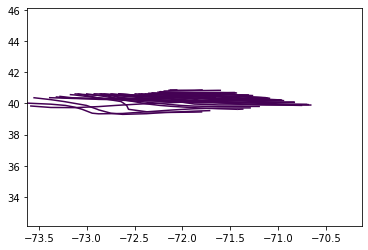

In [307]:
min_lon_JJA = np.empty(41)
lat_lon_JJA = np.empty(41)
for i in range(41):
    line=[]
    C = plt.contour(sst.longitude[25:40]-360,sst.latitude,jja_NYB[i,:,25:40],levels = [20])
    line = C.allsegs[0][0]
    if len(line) == 1:
        min_lon_JJA[i] = np.nan
        lat_lon_JJA[i] = np.nan
    else:
        min_lon_JJA[i] = np.min(line)
        lat_lon_JJA[i] = line[np.where(line[:,0]==np.min(line)),1][0][0]

In [308]:
lat_lon_JJA

array([40.375     , 40.625     , 40.375     , 40.625     , 40.625     ,
       40.625     , 40.42542646, 40.625     , 40.625     , 40.625     ,
       40.02361128, 40.625     , 40.64187871, 40.625     , 40.57229801,
       40.625     , 40.63751012,         nan, 40.46316659, 40.625     ,
       40.64233199, 39.84212491, 40.62133427, 40.76587698, 40.75701213,
       40.625     , 40.80233178, 40.625     ,         nan,         nan,
               nan, 40.67757585, 40.625     , 40.86760453,         nan,
       40.73791731,         nan, 40.85251992,         nan,         nan,
       40.67711273])

<ipython-input-302-7664526faa7c>:5: UserWarning: No contour levels were found within the data range.
  C = plt.contour(sst.longitude[25:40]-360,sst.latitude,jja_NYB[i,:,25:40],levels = [20])


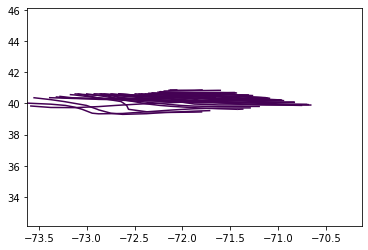

In [302]:
min_lon_JJA = np.empty(41)
lat_lon_JJA = np.empty(41)
for i in range(41):
    line=[]
    C = plt.contour(sst.longitude[25:40]-360,sst.latitude,jja_NYB[i,:,25:40],levels = [20])
    line = C.allsegs[0][0]
    if len(line) == 1:
        min_lon_JJA[i] = np.nan
        lat_lon_JJA[i] = np.nan
    else:
        min_lon_JJA[i] = np.min(line)
        #lat_lon_JJA[i] = line[np.where(line[:,0]==np.min(line)),1][0][0]

<ipython-input-298-fe1aff93af80>:5: UserWarning: No contour levels were found within the data range.
  C = plt.contour(sst.longitude[25:40]-360,sst.latitude,son_NYB[i,:,25:40],levels = [20])


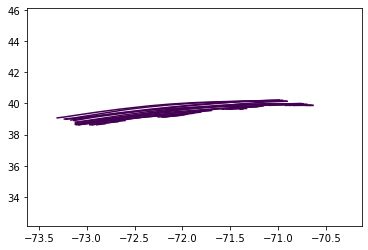

In [298]:
max_lat_SON = np.empty(40)
lat_lon_SON = np.empty(40)
for i in range(40):
    line=[]
    C = plt.contour(sst.longitude[25:40]-360,sst.latitude,son_NYB[i,:,25:40],levels = [20])
    line = C.allsegs[0][0]
    if len(line) == 1:
        max_lat_SON[i] = np.nan
        lat_lon_SON[i] = np.nan
    else:
        max_lat_SON[i] = np.max(line)
        lat_lon_SON[i] = line[np.where(line[:,0]==np.min(line)),0][0][0]

In [236]:
max_lat_SON[0]

40.625

40.442017139910476

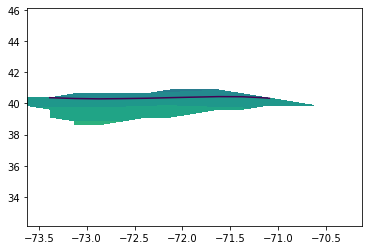

In [303]:
plt.contourf(sst.longitude[25:40]-360, sst.latitude[:], jja_NYB[2,:,25:40],levels = np.arange(11,30,1))
C = plt.contour(sst.longitude[25:40]-360, sst.latitude[:], jja_NYB[2,:,25:40], levels = [20])
line = C.allsegs[0][0]
line
np.max(line)

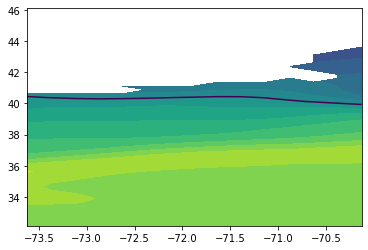

In [304]:
plt.contourf(sst.longitude[25:40]-360, sst.latitude[:], sst_seas[JJA[2],:,25:40], levels = np.arange(11,30,1))
C = plt.contour(sst.longitude[25:40]-360, sst.latitude[:], sst_seas[JJA[2],:,25:40], levels = [20])

line = C.allsegs[0][0]

Text(0.5, 0, 'Longitude')

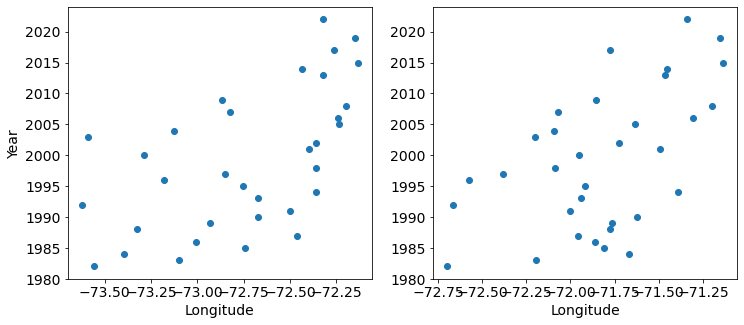

In [305]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = [12,5])
ax[0].scatter(min_lon_JJA,np.arange(1982,2023))
ax[0].tick_params(labelsize = 14)
ax[0].set_ylabel('Year', fontsize = 14)
ax[0].set_xlabel('Longitude', fontsize = 14)

ax[1].scatter(lat_lon_JJA,np.arange(1982,2023))
ax[1].tick_params(labelsize = 14)
#ax[0].set_ylabel('Year', fontsize = 14)
ax[1].set_xlabel('Longitude', fontsize = 14)

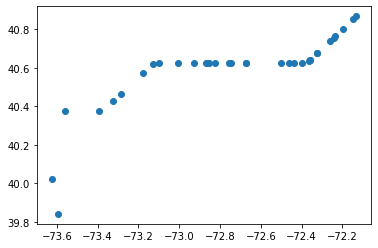

In [309]:
plt.scatter(min_lon_JJA,lat_lon_JJA)

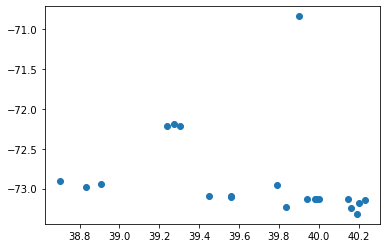

In [300]:
plt.scatter(max_lat_SON, lat_lon_SON)

In [320]:
max_lat_SON = np.append(max_lat_SON,np.nan)
lat_lon_SON = np.append(lat_lon_SON, np.nan)

In [333]:
d = {'SON_lat': max_lat_SON,'SON_lon': lat_lon_SON, 'JJA_lat': lat_lon_JJA, 'JJA_lon' : min_lon_JJA}
Iso20_2022 = pn.DataFrame(data = d, index = time_JJA)
Iso20_2022.to_csv('/Users/nyelab/Desktop/NYB Indicators/NYB_Indicators_Calculations/Final_Timeseries_Figures/Timeseries_Files_2022/Iso20_Aug_26_2022.csv')

In [331]:
len(max_lat_SON)

41

In [330]:
max_lat_SON = np.append(max_lat_SON,np.nan)

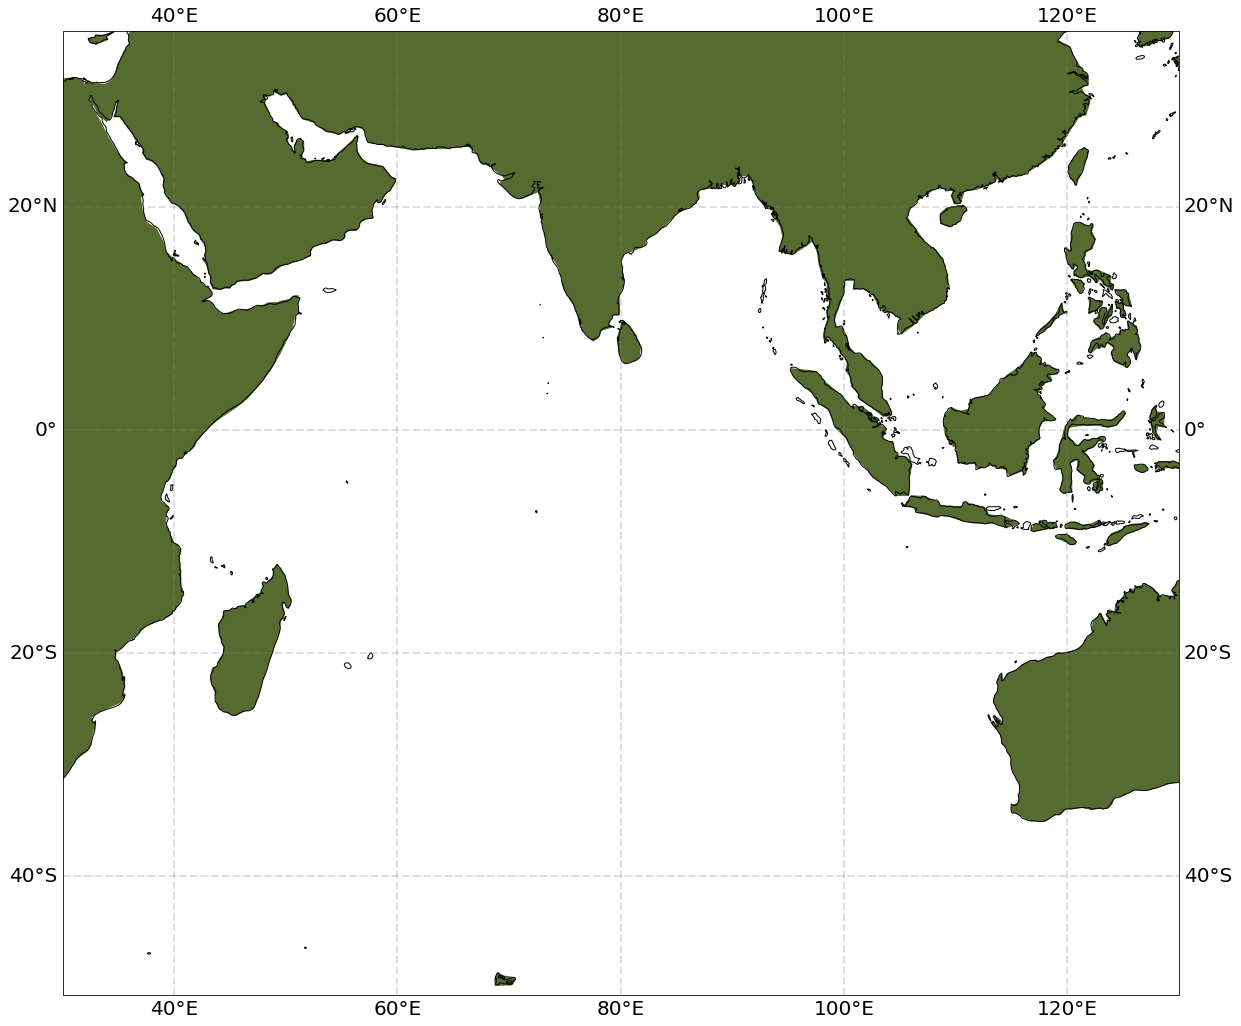

In [19]:
fig,ax = plt.subplots(ncols = 1, nrows = 1, figsize = [20,20],subplot_kw={'projection': ccrs.PlateCarree()})
extent = [30,130,-38.25,25]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.25, linestyle='--')
ax.coastlines(resolution='50m')
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND, color = 'darkolivegreen')
#ax.add_geometries(NYB.geometry,
#                  ccrs.PlateCarree(),
#                  facecolor='none', edgecolor = 'k')
gl.ylabel_style = {'size': 20, 'color': 'k'}
gl.xlabel_style = {'size': 20, 'color': 'k'}

In [44]:
T6 = T6.reset_index()

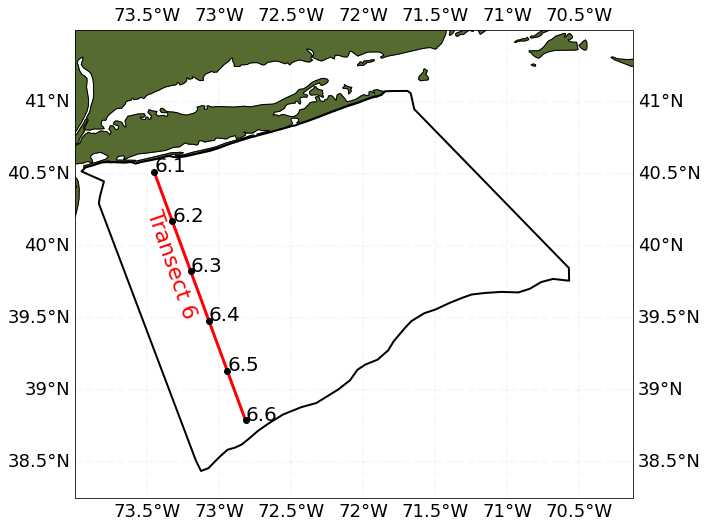

In [72]:
fig,ax = plt.subplots(ncols = 1, nrows = 1, figsize = [10,10],subplot_kw={'projection': ccrs.PlateCarree()})
extent = [286,289.875,38.25,41.5]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
ax.coastlines(resolution='10m')
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND, color = 'darkolivegreen')
ax.add_geometries(NYB.geometry,
                  ccrs.PlateCarree(),
                  facecolor='none', edgecolor = 'k', linewidth = 2)
ax.plot(T6.LON, T6.LAT, linewidth = 3, c = 'r')
scat = ax.scatter(T6.LON, T6.LAT,c = 'k', zorder = 3)
for i, txt in enumerate(np.array(T6.Waypoint)):
    ax.annotate(txt, (T6.LON[i], T6.LAT[i]), fontsize = 20)
ax.annotate('Transect 6', (-73.53,39.5), c = 'r', fontsize = 22, rotation = -71)
gl.ylabel_style = {'size': 18, 'color': 'k'}
gl.xlabel_style = {'size': 18, 'color': 'k'}

In [4]:
stations = pn.read_csv('/Users/nyelab/Downloads/nyos_station_list.csv')

In [7]:
T6 = stations[stations['Transect'] == 6]

In [8]:
T6

,Waypoint,Type,Depth,LON,LAT,Transect
27,6.1,CTD,-19.430363,-73.451237,40.514641,6
28,6.2,CTD,-41.398098,-73.324238,40.169191,6
29,6.3,CTD-PLUME,-45.021019,-73.197239,39.823742,6
30,6.4,CTD-PLUME,-66.923309,-73.070240,39.478292,6
31,6.5,CTD,-81.326416,-72.943241,39.132842,6
32,6.6,CTD,-1392.581700,-72.816243,38.787392,6
